In [100]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import math

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import plotly.express as px

In [3]:
pd.options.plotting.backend = "plotly"

Источник данных: Метеостанция Санкт-Петербург, Россия, WMO_ID=26063, выборка с 01.02.2005 по 25.01.2023, все дни

Кодировка: UTF-8

Информация предоставлена сайтом ["Расписание Погоды"](http://rp5.ru/)

Обозначения метеопараметров:

обозначение | параметр 
:---:|:---
Дата / Местное время |	Время в данном населённом пункте. Учитывается летнее/зимнее время
T |	Температура воздуха (градусы Цельсия) на высоте 2 метра над поверхностью земли
Po |	Атмосферное давление на уровне станции (миллиметры ртутного столба)
P |	Атмосферное давление, приведенное к среднему уровню моря (миллиметры ртутного столба)
Pa |	Барическая тенденция: изменение атмосферного давления за последние три часа (миллиметры ртутного столба)
U |	Относительная влажность (%) на высоте 2 метра над поверхностью земли
DD |	Направление ветра (румбы) на высоте 10-12 метров над земной поверхностью, осредненное за 10-минутный период, непосредственно предшествовавший сроку наблюдения
Ff |	Cкорость ветра на высоте 10-12 метров над земной поверхностью, осредненная за 10-минутный период, непосредственно предшествовавший сроку наблюдения (метры в секунду)
ff10 |	Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за 10-минутный период, непосредственно предшествующий сроку наблюдения (метры в секунду)
ff3 |	Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за период между сроками (метры в секунду)
N |	Общая облачность
WW |	Текущая погода, сообщаемая с метеорологической станции
W1 |	Прошедшая погода между сроками наблюдения 1
W2 |	Прошедшая погода между сроками наблюдения 2
Tn |	Минимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Tx |	Максимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Cl |	Слоисто-кучевые, слоистые, кучевые и кучево-дождевые облака
Nh |	Количество всех наблюдающихся облаков Cl или, при отсутствии облаков Cl, количество всех наблюдающихся облаков Cm
H |	Высота основания самых низких облаков (м)
Cm |	Высококучевые, высокослоистые и слоисто-дождевые облака
Ch |	Перистые, перисто-кучевые и перисто-слоистые облака
VV |	Горизонтальная дальность видимости (км)
Td |	Температура точки росы на высоте 2 метра над поверхностью земли (градусы Цельсия)
RRR |	Количество выпавших осадков (миллиметры)
tR |	Период времени, за который накоплено указанное количество осадков (часы)
E |	Состояние поверхности почвы без снега или измеримого ледяного покрова
Tg |	Минимальная температура поверхности почвы за ночь. (градусы Цельсия)
E' |	Состояние поверхности почвы со снегом или измеримым ледяным покровом
sss |	Высота снежного покрова (см)

In [157]:
dataset = '26063.01.02.2005.25.01.2023.1.0.0.ru.utf8.00000000.csv'

In [158]:
df = pd.read_csv(dataset, sep=';', comment='#', quotechar='"', 
                 index_col=False, low_memory=False)

In [159]:
df

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,25.01.2023 15:00,1.6,762.4,762.8,-2.0,89.0,"Ветер, дующий с юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,25.01.2023 12:00,0.8,764.4,764.8,-2.0,88.0,"Ветер, дующий с юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,25.01.2023 09:00,0.3,766.4,766.8,-1.7,87.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,NaN,NaN,19.0,-1.7,NaN,NaN,NaN,NaN,NaN,NaN
3,25.01.2023 06:00,0.2,768.1,768.6,-1.8,89.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,-1.5,0.6,12.0,NaN,NaN,NaN,NaN
4,25.01.2023 03:00,0.3,769.9,770.3,-1.1,92.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,NaN,NaN,4.0,-0.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52328,01.02.2005 15:00,-7.5,753.5,754.1,NaN,76.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-11.0,NaN,NaN,NaN,NaN,NaN,NaN
52329,01.02.2005 12:00,-8.8,752.6,753.2,NaN,76.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-12.2,NaN,NaN,NaN,NaN,NaN,NaN
52330,01.02.2005 09:00,-9.4,751.5,752.1,NaN,76.0,"Ветер, дующий с юго-юго-востока",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-12.9,3.0,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,19.0
52331,01.02.2005 06:00,-9.6,750.4,751.0,NaN,75.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-13.2,NaN,NaN,NaN,NaN,NaN,NaN


Преобразование местного времени в datetime и использование его в качестве индекса

In [160]:
df['datetime'] = pd.to_datetime(df['Местное время в Санкт-Петербурге'], 
                                format='%d.%m.%Y %H:%M')

In [161]:
df['year'] = df.datetime.dt.year
df['hour'] = df.datetime.dt.hour
df['dayofyear'] = df.datetime.dt.dayofyear
df.drop(['Местное время в Санкт-Петербурге'], inplace=True, axis=1)
df = df.set_index("datetime").sort_index()

Изучаем уникальные значения в столбцах N и Nh

In [162]:
print(df['N'].unique())
print(df['Nh'].unique())

['100%.' 'Облаков нет.' '20–30%.' '60%.' '70 – 80%.' '50%.'
 '90  или более, но не 100%'
 'Небо не видно из-за тумана и/или других метеорологических явлений.'
 '10%  или менее, но не 0' '40%.' nan]
['100%.' '70 – 80%.' '20–30%.' '60%.' nan '50%.' '40%.'
 '10%  или менее, но не 0' 'Облаков нет.' '90  или более, но не 100%'
 'Небо не видно из-за тумана и/или других метеорологических явлений.']


Заменяем категориальных данных для облачности (N и Nh) на числовые. Для варианта "Небо не видно" выбираем 1.1

In [163]:
N_cat = ['Облаков нет.', '10%  или менее, но не 0', '20–30%.', '40%.',
         '50%.', '60%.', '70 – 80%.', '90  или более, но не 100%', '100%.',
         'Небо не видно из-за тумана и/или других метеорологических явлений.']
N_num = [0.0, 0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0, 1.1]
df['N'].replace(N_cat, N_num, inplace=True)
df['Nh'].replace(N_cat, N_num, inplace=True)

Изучаем уникальные значения в столбце H 

In [164]:
print(df['H'].unique())

['200-300' '300-600' '600-1000' nan '2500 или более, или облаков нет.'
 '100-200' '1000-1500' '1500-2000' 'Менее 50' '50-100' '2000-2500']


Заменяем категориальные данные для высоты облаков H на числовые. 
Используем средние значения указанного диапазона или границу для крайних.

In [165]:
H_cat = ['Менее 50', '50-100', '100-200', '200-300', '300-600', '600-1000',
    '1000-1500', '1500-2000', '2000-2500', '2500 или более, или облаков нет.']
H_num = [50, 75, 150, 250, 450, 800, 1250, 1750, 2250, 2500]
df['H'].replace(H_cat, H_num, inplace=True)

Изучаем данные в столбцах VV и RRR

In [166]:
print(df['VV'].unique())
print(df['RRR'].unique())

['4.0' '10.0' '2.0' '0.5' '1.0' nan '0.05' '0.2' '1.6' '2.2' '20.0' '17.0'
 '3.7' '0.7' '19.0' '50.0' 'менее 0.1' '0.4' '29.0' '0.1' '27.0' '6.0'
 '0.3' '45.0' '4.7' '1.5' '18.0' '13.0' '12.0' '11.0' '15.0' '14.0' '16.0'
 '2.7' '3.1' '8.0' '3.0']
[nan '3.0' '0.3' '0.5' 'Следы осадков' '0.8' '0.6' '0.7' '0.2' '2.0' '0.4'
 '4.0' '1.0' '5.0' '7.0' '6.0' '11.0' '9.0' '8.0' '19.0' '12.0' '0.1'
 '38.0' '14.0' '0.9' '16.0' '10.0' '17.0' 'Осадков нет' '23.0' '30.0'
 '21.0' '13.0' '15.0' '18.0' '22.0' '26.0' '24.0' '28.0' '27.0' '20.0'
 '25.0' '35.0' '48.0' '31.0' '29.0']


В столбце "Горизонтальная дальность видимости" почти все значения числовые, но встречается значение "Менее 0.1" - заменяем его на 0.5

In [167]:
df['VV'].replace('менее 0.1', 0.05, inplace=True)

В столбце "Количество выпавших осадков" заменяем "следы осадков" на 0.05 (так как минимальное чиловое значение в этом столбце = 0.1).
Значение "осадков нет" меняем на 0.

In [168]:
RRR_cat = ['Следы осадков', 'Осадков нет']
RRR_num = [0.05, 0]
df['RRR'].replace(RRR_cat, RRR_num, inplace=True)

Разбираемся с ветром, изучаем значения в столбце DD, и преобразуем столбцы DD и Ff в векторное представление ветра. Направление определяем по столбцу DD, а длина вектора будет равна силе ветра из столбца Ff.
Результирующие столбцы - Wind_W (вектор, направленный с запада вдоль оси X) и Wind_S (вектор, направленный с запада вдоль оси X)(вектор, направленный с юга вдоль оси Y) 


In [169]:
df['DD'].unique()

array(['Ветер, дующий с юго-востока', 'Ветер, дующий с юга',
       'Ветер, дующий с юго-юго-востока',
       'Ветер, дующий с юго-юго-запада',
       'Ветер, дующий с востоко-юго-востока',
       'Ветер, дующий с юго-запада', 'Ветер, дующий с западо-юго-запада',
       'Ветер, дующий с запада', 'Ветер, дующий с западо-северо-запада',
       'Штиль, безветрие', 'Ветер, дующий с востока',
       'Ветер, дующий с востоко-северо-востока',
       'Ветер, дующий с северо-востока',
       'Ветер, дующий с северо-северо-запада',
       'Ветер, дующий с северо-северо-востока', 'Ветер, дующий с севера',
       'Ветер, дующий с северо-запада', nan], dtype=object)

In [170]:
# Wind categories
DD_cat = ['Штиль, безветрие', 
          'Ветер, дующий с востоко-северо-востока',
          'Ветер, дующий с северо-востока',
          'Ветер, дующий с северо-северо-востока',
          'Ветер, дующий с севера',
          'Ветер, дующий с северо-северо-запада',
          'Ветер, дующий с северо-запада',
          'Ветер, дующий с западо-северо-запада',
          'Ветер, дующий с запада', 
          'Ветер, дующий с западо-юго-запада',
          'Ветер, дующий с юго-запада',
          'Ветер, дующий с юго-юго-запада',
          'Ветер, дующий с юга',
          'Ветер, дующий с юго-юго-востока',
          'Ветер, дующий с юго-востока',
          'Ветер, дующий с востоко-юго-востока',
          'Ветер, дующий с востока',
         ]
# Arrays with cos and sin of corresponding angles
DD_cos = [math.cos(x*math.pi/8) for x in range(-7, 9)]
DD_sin = [math.sin(x*math.pi/8) for x in range(-7, 9)]
# First element is 'No wind, zero vector'
DD_cos.insert(0, 0)
DD_sin.insert(0, 0)

In [171]:
df['Wind_W'] = df['DD'].replace(DD_cat, DD_cos) * df['Ff']
df['Wind_S'] = df['DD'].replace(DD_cat, DD_sin) * df['Ff']
df.drop(['DD','Ff'], inplace=True, axis=1)

Проводим аналогичные действия для облаков нижнего (Cl), среднего (Cm), верхнего (Ch) ярусов.
Описания в датасете соответствуют классам из международного атласа облаков, поэтому меняем текстовое описание на номер класса.

In [172]:
df["Cl"].unique()

array(['Слоистые разорванные или кучевые разорванные облака плохой погоды, либо те и другие вместе (разорванно-дождевые); обычно расположены под слоистыми или слоисто-дождевыми облаками.',
       'Слоисто-кучевые, образовавшиеся из кучевых.',
       'Слоисто-кучевые, образовавшиеся не из кучевых.',
       'Кучевые средние или мощные или вместе с кучевыми разорванными, или с кучевыми плоскими, или со слоисто-кучевыми, либо без них; основания всех этих облаков расположены на одном уровне.',
       'Кучево-дождевые лысые с кучевыми, слоисто-кучевыми или слоистыми, либо без них.',
       nan,
       'Кучево-дождевые волокнистые (часто с наковальней), либо с кучево-дождевыми лысыми, кучевыми, слоистыми, разорванно-дождевыми, либо без них.',
       'Кучевые и слоисто-кучевые (но не слоисто-кучевые, образовавшиеся из кучевых), основания расположены на разных уровнях.',
       'Кучевые плоские или кучевые разорванные, или те и другие вместе, не относящиеся к облакам плохой погоды.',
       'Сл

In [173]:
Cl_cat = [
       'Слоисто-кучевых, слоистых, кучевых или кучево-дождевых облаков нет.',
       'Кучевые плоские или кучевые разорванные, или те и другие вместе, не относящиеся к облакам плохой погоды.',
       'Кучевые средние или мощные или вместе с кучевыми разорванными, или с кучевыми плоскими, или со слоисто-кучевыми, либо без них; основания всех этих облаков расположены на одном уровне.',
       'Кучево-дождевые лысые с кучевыми, слоисто-кучевыми или слоистыми, либо без них.',
       'Слоисто-кучевые, образовавшиеся из кучевых.',
       'Слоисто-кучевые, образовавшиеся не из кучевых.',
       'Слоистые туманообразные или слоистые разорванные, либо те и другие, но не относящиеся к облакам плохой погоды.',
       'Слоистые разорванные или кучевые разорванные облака плохой погоды, либо те и другие вместе (разорванно-дождевые); обычно расположены под слоистыми или слоисто-дождевыми облаками.',
       'Кучевые и слоисто-кучевые (но не слоисто-кучевые, образовавшиеся из кучевых), основания расположены на разных уровнях.',
       'Кучево-дождевые волокнистые (часто с наковальней), либо с кучево-дождевыми лысыми, кучевыми, слоистыми, разорванно-дождевыми, либо без них.',
]
Cl_num = [0,1,2,3,4,5,6,7,8,9]
df['Cl'].replace(Cl_cat, Cl_num, inplace=True)

In [174]:
df["Cm"].unique()

array(['Высокослоистые просвечивающие.',
       'Высококучевые башенкообразные или хлопьевидные.',
       'Высокослоистые непросвечивающие или слоисто-дождевые.',
       'Высококучевые просвечивающие, расположенные на одном уровне.',
       nan,
       'Высококучевые, просвечивающие или плотные в двух или более слоях или высококучевые плотные в одном слое, не распространяющиеся но небу, либо высококучевые с высокослоистыми или слоисто-дождевыми.',
       'Высококучевые, образовавшиеся из кучевых (или кучево-дождевых).',
       'Клочья (часто чечевицеобразные) высококучевых просвечивающих, непрерывно изменяющихся; расположены на одном или более уровнях.',
       'Высококучевые просвечивающие, полосами, либо один или несколько слоев высококучевых просвечивающих, распространяющихся по небу; эти высококучевые в целом уплотняются.',
       'Высококучевые при хаотическом виде неба, обычно расположенные на нескольких уровнях.',
       'Высококучевых, высокослоистых или слоисто-дождевых облако

In [175]:
Cm_cat = [
       'Высококучевых, высокослоистых или слоисто-дождевых облаков нет.',
       'Высокослоистые просвечивающие.',
       'Высокослоистые непросвечивающие или слоисто-дождевые.',
       'Высококучевые просвечивающие, расположенные на одном уровне.',
       'Клочья (часто чечевицеобразные) высококучевых просвечивающих, непрерывно изменяющихся; расположены на одном или более уровнях.',
       'Высококучевые просвечивающие, полосами, либо один или несколько слоев высококучевых просвечивающих, распространяющихся по небу; эти высококучевые в целом уплотняются.',
       'Высококучевые, образовавшиеся из кучевых (или кучево-дождевых).',
       'Высококучевые, просвечивающие или плотные в двух или более слоях или высококучевые плотные в одном слое, не распространяющиеся но небу, либо высококучевые с высокослоистыми или слоисто-дождевыми.',
       'Высококучевые башенкообразные или хлопьевидные.',
       'Высококучевые при хаотическом виде неба, обычно расположенные на нескольких уровнях.',
         ]
Cm_num = [0,1,2,3,4,5,6,7,8,9]
df['Cm'].replace(Cm_cat, Cm_num, inplace=True)

In [176]:
df["Ch"].unique()

array(['Перисто-кучевые одни или перисто-кучевые, сопровождаемые перистыми или перисто-слоистыми, либо те и другие, но перисто-кучевые преобладают среди них.',
       'Перистые нитевидные, иногда когтевидные, не распространяющиеся по небу.',
       nan,
       'Перистые (часто в виде полос) и перисто-слоистые, распространяющиеся по небу и в целом обычно уплотняющиеся, но сплошная пелена поднимается над горизонтом менее чем на 45°.',
       'Перистые (часто в виде полос) и перисто-слоистые, распространяющиеся по небу и в целом обычно уплотняющиеся; сплошная пелена, поднимающаяся над горизонтом выше 45°, не покрывает всего неба.',
       'Перистые плотные, образовавшиеся от кучево-дождевых.',
       'Перисто-слоистые, покрывающие все небо.',
       'Перистые плотные в виде клочьев или скрученных склонов, количество которых обычно не увеличивается, иногда могут казаться остатками верхней части кучево-дождевых; или перистые башенкообразные, или перистые хлопьевидные.',
       'Перистые ког

In [177]:
Ch_cat = [
       'Перистых, перисто-кучевых или перисто-слоистых нет.',
       'Перистые нитевидные, иногда когтевидные, не распространяющиеся по небу.',
       'Перистые плотные в виде клочьев или скрученных склонов, количество которых обычно не увеличивается, иногда могут казаться остатками верхней части кучево-дождевых; или перистые башенкообразные, или перистые хлопьевидные.',
       'Перистые плотные, образовавшиеся от кучево-дождевых.',
       'Перистые когтевидные или нитевидные или первые и вторые, распространяющиеся по небу и в целом обычно уплотняющиеся.',
       'Перистые (часто в виде полос) и перисто-слоистые, распространяющиеся по небу и в целом обычно уплотняющиеся, но сплошная пелена поднимается над горизонтом менее чем на 45°.',
       'Перистые (часто в виде полос) и перисто-слоистые, распространяющиеся по небу и в целом обычно уплотняющиеся; сплошная пелена, поднимающаяся над горизонтом выше 45°, не покрывает всего неба.',
       'Перисто-слоистые, покрывающие все небо.',
       'Перисто-слоистые, не распространяющиеся по небу и не покрывающие его полностью.',
       'Перисто-кучевые одни или перисто-кучевые, сопровождаемые перистыми или перисто-слоистыми, либо те и другие, но перисто-кучевые преобладают среди них.',
         ]
Ch_num = [0,1,2,3,4,5,6,7,8,9]
df['Ch'].replace(Ch_cat, Ch_num, inplace=True)

Можно предположить, что отсутствующие значения соответствуют отсутствию данного вида облаков в этот день, поэтому заполняем отсутствующие значения нулями (нулевой класс - отсуствие таких облаков)

In [59]:
df[["Cl","Cm","Ch"]].fillna(0)

,Cl,Cm,Ch
datetime,,,
2005-02-01 03:00:00,7.0,1.0,9.0
2005-02-01 06:00:00,4.0,8.0,9.0
2005-02-01 09:00:00,4.0,8.0,9.0
2005-02-01 12:00:00,7.0,1.0,9.0
2005-02-01 15:00:00,5.0,2.0,9.0
...,...,...,...
2023-01-25 03:00:00,6.0,0.0,0.0
2023-01-25 06:00:00,7.0,2.0,0.0
2023-01-25 09:00:00,0.0,0.0,0.0


Столбцы, характеризующие осадки, содержат наиболее разнообразные значения, поэтому для упрощения модели создадим столбец, в котором сформируем 4 категории типа осадков: Нет, Снег, Град, Дождь. К дождю будут относиться все виды дождя и морось. К снегу - все виды снега и снежная или ледяная крупа.
    

In [178]:
df['Precipitation'] = "Нет"
for p in [r'крупа', r'снег', r'^Снег']:
    for w in ['W2','W1','WW']:
        df.loc[df[w].str.contains(p, na=False),['Precipitation']] = 'Снег'

In [179]:
for p in [r'град']:
    for w in ['W2','W1','WW']:
        df.loc[df[w].str.contains(p, na=False),['Precipitation']] = 'Град'

In [180]:
for p in [r'^Морось', r'дожд', r'^Дождь']:
    for w in ['W2','W1','WW']:
        df.loc[df[w].str.contains(p, na=False),['Precipitation']] = 'Дождь'

Опять же для упрощения и для исключения возможных ошибок, заменим тип Дождь при отрицательной температуре на Снег, а Снег при положительной температуре - на Дождь.

In [63]:
df.loc[(df['Precipitation'] == 'Дождь') & (df['T'] < 0),['Precipitation']] = 'Снег'
df.loc[(df['Precipitation'] == 'Снег') & (df['T'] >= 0),['Precipitation']] = 'Дождь'


Сформируем также столбец для бинарной классификации осадков - 0 или 1

In [200]:
df['Prnum'] = 1
df.loc[(df['Precipitation'] == 'Нет'),['Prnum']] = 0;

Создаем рабочий датасет, исключив все столбцы, где более 200 значений NaN.

In [225]:
wdf = df.loc[:, df.isna().sum()<200].dropna().copy()

In [202]:
wdf.describe()

,T,Po,P,U,N,Td,year,hour,dayofyear,Wind_W,Wind_S,Prnum
count,51916.000000,51916.000000,51916.000000,51916.000000,51916.000000,51916.000000,51916.000000,51916.000000,51916.000000,51916.000000,5.191600e+04,51916.000000
mean,6.827779,759.546352,760.082809,75.935338,0.709001,2.369218,2013.602647,10.518607,183.287850,0.562573,3.704964e-01,0.327799
std,9.818361,8.510822,8.519852,16.476029,0.367922,8.639205,5.188152,6.871105,105.384573,1.619293,1.534733e+00,0.469416
min,-27.700000,719.500000,720.000000,14.000000,0.000000,-34.800000,2005.000000,0.000000,1.000000,-6.467157,-8.000000e+00,0.000000
25%,0.300000,754.300000,754.900000,67.000000,0.400000,-3.100000,2009.000000,6.000000,92.000000,-0.707107,-3.826834e-01,0.000000
50%,6.300000,759.700000,760.200000,81.000000,0.900000,2.100000,2014.000000,12.000000,183.000000,0.382683,1.224647e-16,0.000000
75%,14.600000,764.800000,765.400000,89.000000,1.000000,9.400000,2018.000000,18.000000,275.000000,1.847759,1.414214e+00,1.000000
max,36.700000,793.300000,793.900000,100.000000,1.100000,23.800000,2023.000000,21.000000,366.000000,8.000000,8.314916e+00,1.000000


График температуры в 12 часов дня за 2022 год - отображение с помощью plotly

In [203]:
wdf.loc[wdf.index.hour == 12].loc['2022-01-01':'2022-12-31',['T']].plot()

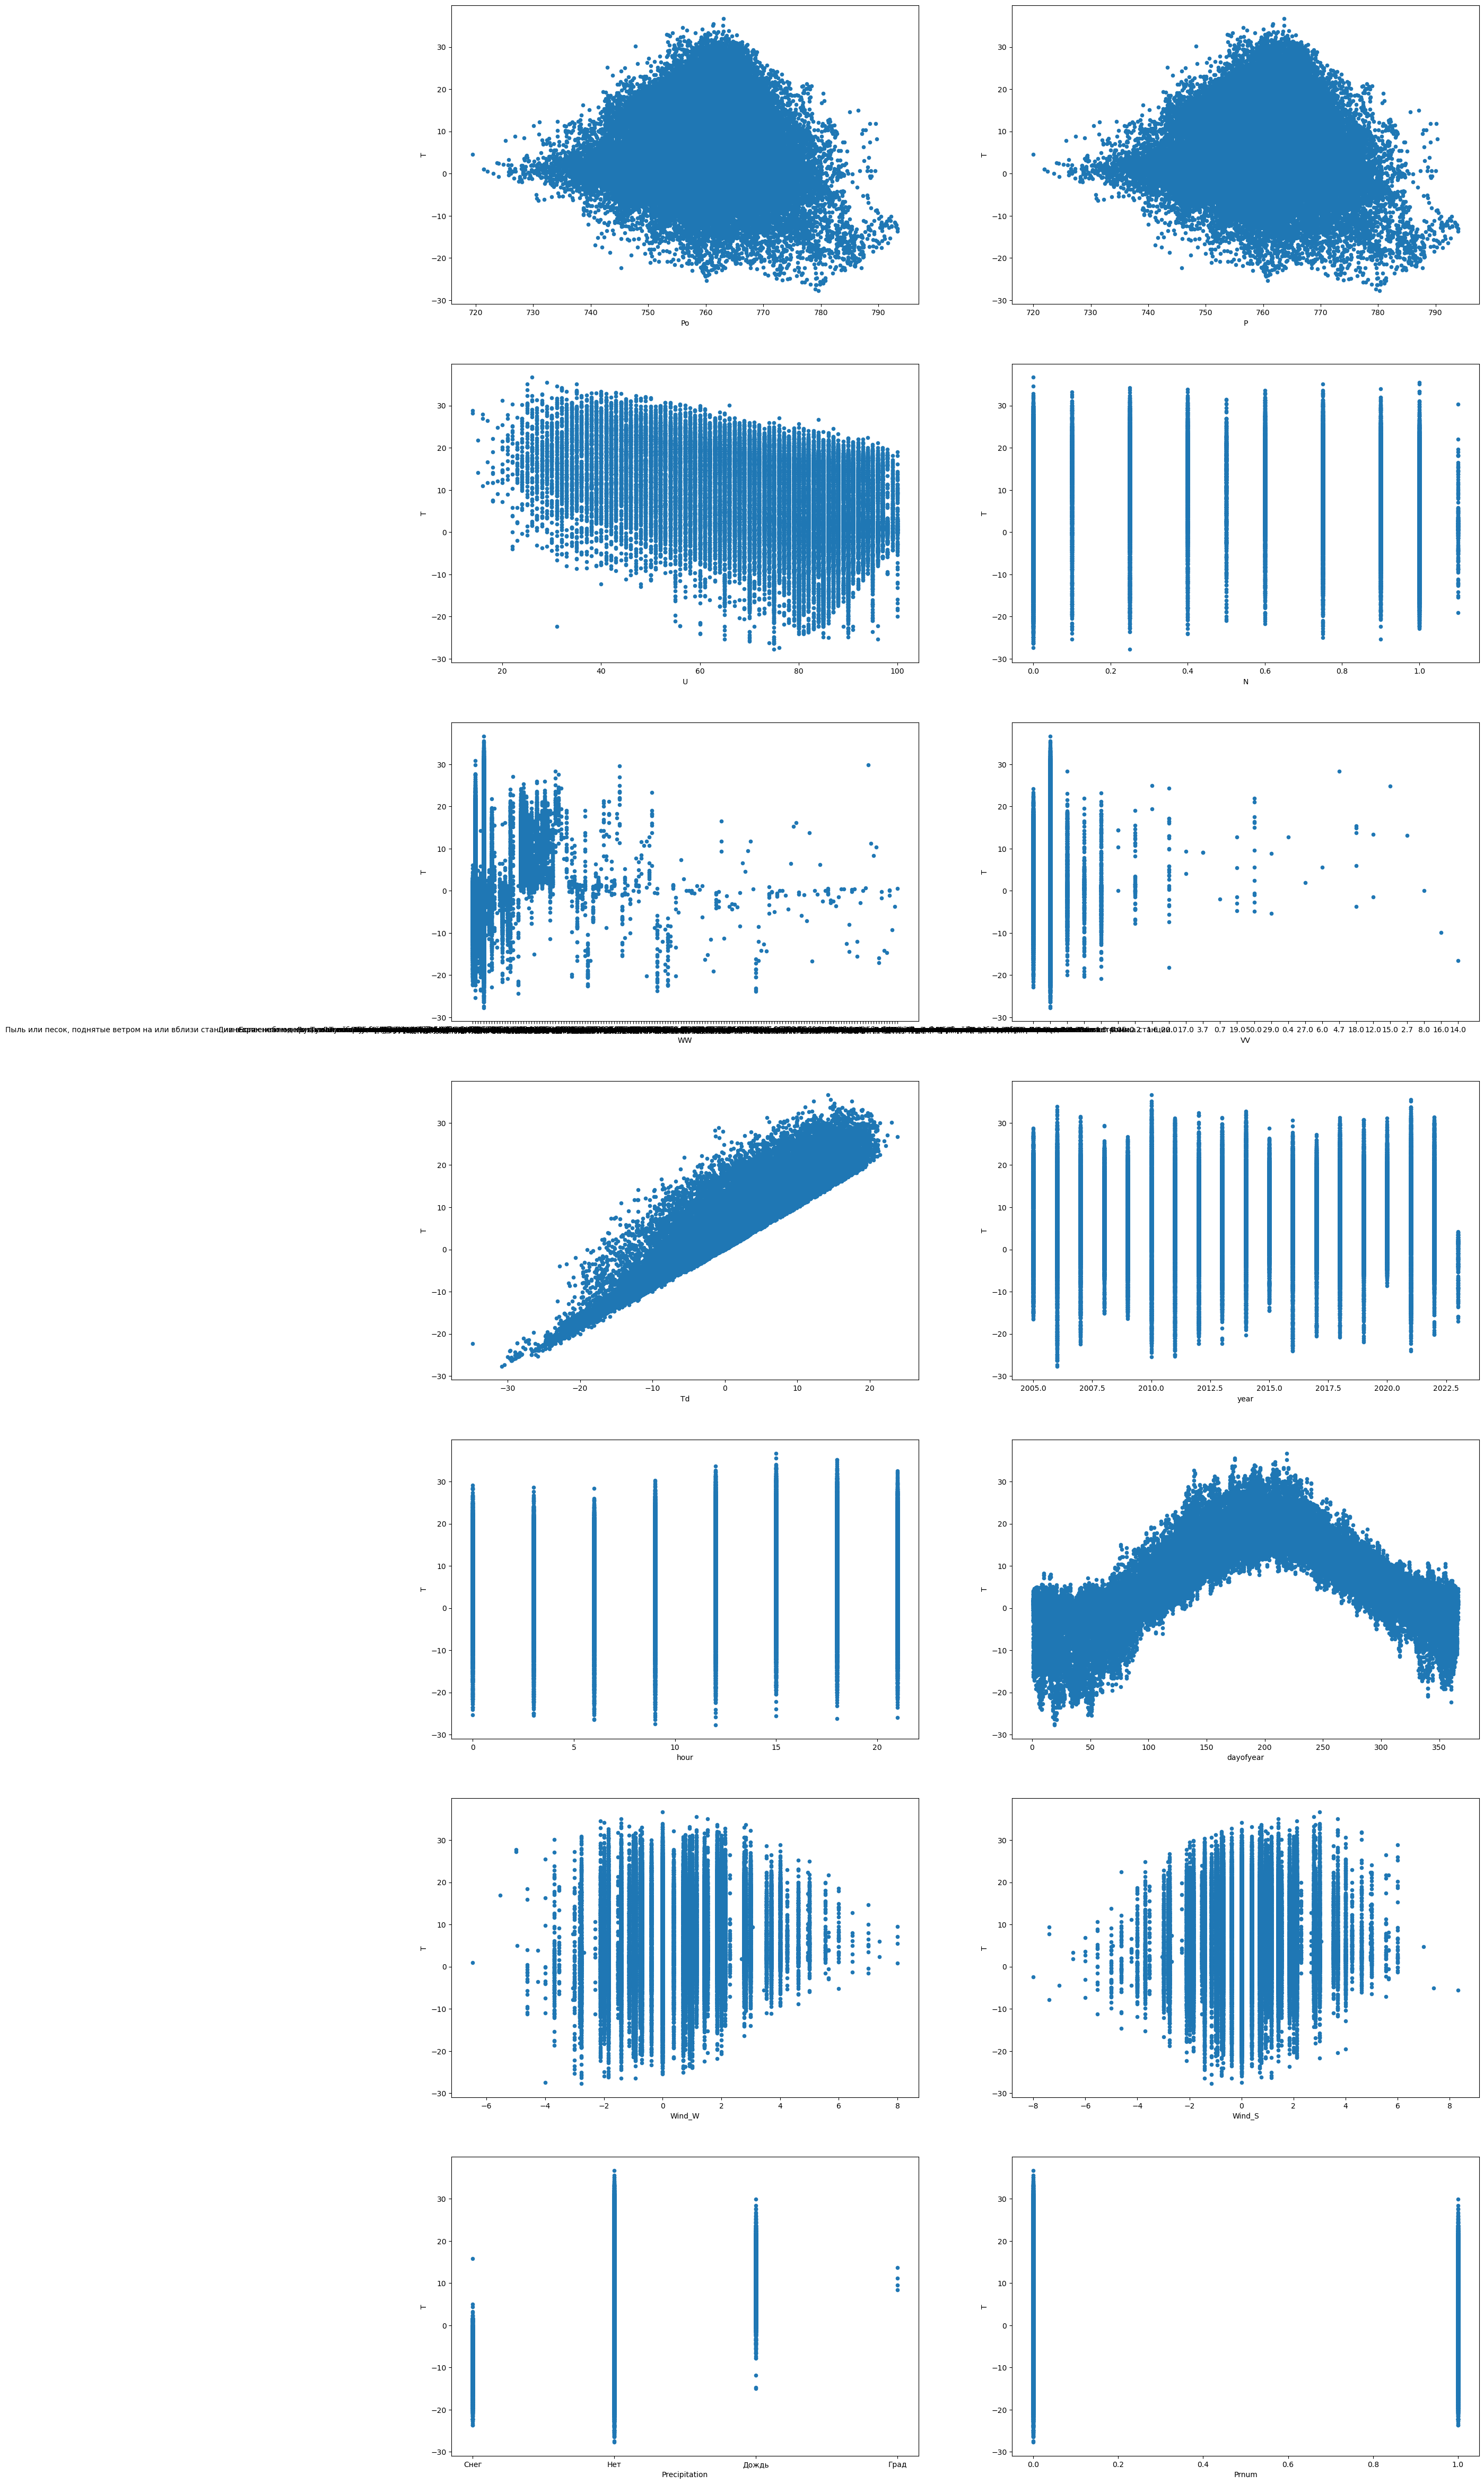

In [204]:
target = "T"
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(25, 60))
delta = 0
for idx, feature in enumerate(wdf.columns):
    if feature == target:
        delta = 1
        continue
    idxd = idx - delta
    wdf.plot(feature, target, subplots=True, kind="scatter", 
             ax=axes[idxd // 2, idxd % 2], backend='matplotlib')

In [205]:
wdf.plot.scatter('dayofyear', 'T')

Коррелляция между параметрами - plotly heatmap

In [206]:
fig = px.imshow(wdf.corr(numeric_only=True), color_continuous_scale='RdYlBu')
fig.show()

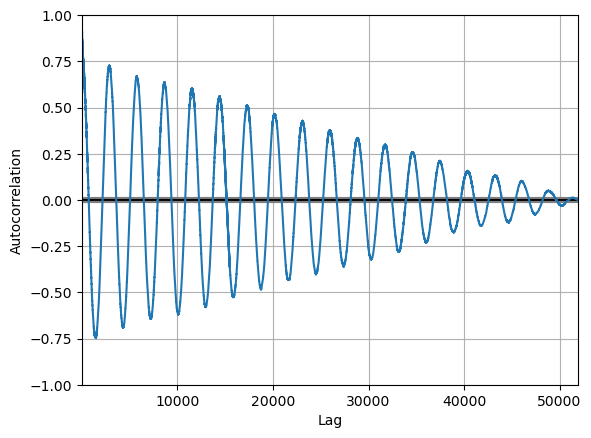

In [207]:
# Autocorrellation exists!

plt.figure();
autocorrelation_plot(wdf[['T']]);

In [208]:
wdf

,T,Po,P,U,N,WW,VV,Td,year,hour,dayofyear,Wind_W,Wind_S,Precipitation,Prnum
datetime,,,,,,,,,,,,,,,
2005-02-01 03:00:00,-8.8,749.4,750.0,83.0,1.0,Снег непрерывный слабый в срок наблюдения.,4.0,-11.2,2005,3,32,-2.828427e+00,2.828427,Снег,1
2005-02-01 06:00:00,-9.6,750.4,751.0,75.0,1.0,Состояние неба в общем не изменилось.,10.0,-13.2,2005,6,32,1.836970e-16,3.000000,Снег,1
2005-02-01 09:00:00,-9.4,751.5,752.1,76.0,1.0,Снег с перерывами слабый в срок наблюдения.,10.0,-12.9,2005,9,32,-1.148050e+00,2.771639,Снег,1
2005-02-01 12:00:00,-8.8,752.6,753.2,76.0,1.0,Снег непрерывный слабый в срок наблюдения.,10.0,-12.2,2005,12,32,-2.121320e+00,2.121320,Снег,1
2005-02-01 15:00:00,-7.5,753.5,754.1,76.0,1.0,Снег непрерывный слабый в срок наблюдения.,10.0,-11.0,2005,15,32,1.836970e-16,3.000000,Снег,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 00:00:00,0.3,771.0,771.4,94.0,1.0,Морось незамерзающая непрерывная слабая в срок...,4.0,-0.6,2023,0,25,2.121320e+00,2.121320,Дождь,1
2023-01-25 03:00:00,0.3,769.9,770.3,92.0,1.0,Морось незамерзающая непрерывная слабая в срок...,4.0,-0.8,2023,3,25,2.121320e+00,2.121320,Дождь,1
2023-01-25 06:00:00,0.2,768.1,768.6,89.0,1.0,Снег непрерывный слабый в срок наблюдения. Ди...,4.0,-1.5,2023,6,25,2.121320e+00,2.121320,Дождь,1


Начинаем тренировку модели. 
Делим набор данных на исходные и целевые признаки: 
    Будем предсказывать температуру и осадки. T - температура, Precipitation - осадки в виде 4 категорий, Prnum - осадки в виде 2 классов, есть или нет.

In [226]:
# split dataset into data and target
X = wdf.drop(['T','Precipitation','Prnum', 'WW'], axis=1)
y = wdf[['T', 'Prnum', 'Precipitation']]

In [227]:
# split dataset into training and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

# apply standard scaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

В качестве базовой попробуем использовать линейную регрессию для температуры.
После тренировки смотрим метрики - среднеквадратичную ошибку и R2-score.

In [228]:
# train and test base linear model and check MSE and R2 score

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train['T'])
y_pred = model.predict(X_test)
print(mean_squared_error(y_test['T'], y_pred))
print(r2_score(y_test['T'], y_pred))


0.4947930942420261
0.9948580148097551


Результаты почти идеальные, но если посмотреть коэффициенты, то видно, что в основном используется Td (точка росы), у которой высокая коррелляция с температурой воздуха.
Это не очень интересно - предсказывать температуру по связанному с ней параметру, поэтому удалим этот признак из набора и усложним задачу.

In [229]:
model.coef_

array([-8.76716225e-05, -1.50965267e-04, -2.38039859e-01,  6.15533435e-03,
       -7.56631489e-02,  1.03203803e+00,  1.43072736e-03,  2.20139432e-03,
        1.09109237e-05, -1.92865988e-02,  1.63774552e-02])

In [230]:
# Repeat split without Td feature

X_train, X_test, y_train, y_test = train_test_split(X.drop('Td', axis=1), y, random_state=34)

# And again apply standard scaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

Теперь стало уже интереснее. Линейная регрессия выдает R2 score около 0.3. Попробуем дерево решений.
У дерева получается значительно лучше - 0.88

In [231]:
model = LinearRegression()
model.fit(X_train, y_train['T'])
y_pred = model.predict(X_test)
print(mean_squared_error(y_test['T'], y_pred))
print(r2_score(y_test['T'], y_pred))

66.99802400578885
0.30374362289518186


In [232]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train['T'])
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test['T'], y_pred))
print(r2_score(y_test['T'], y_pred))

10.826537483627398
0.8874885360157994


Отобразим полученные предсказания для линейной модели и для дерева решений. Чтобы не перегружать график, покажем температуру только дял 15 часов дня и только для июня 2022 года.

In [233]:
Res = wdf
Res['linear'] = model.predict(Res.drop(['T','Precipitation','Prnum', 'WW', 'Td'], axis=1))
Res['tree'] = clf.predict(Res.drop(['T','Precipitation','Prnum', 'WW', 'Td','linear'], axis=1))

In [234]:
Res.loc["2022-6"].loc[Res.hour==15,['T','linear', 'tree']].plot()

Теперь обучим модели для классификации - применим логистическую регрессию для двух классов осадков - да и нет.
И дерево решений для 4 классов - пусть дерево еще и тип осадков предсказывает. Для базовой модели возьмем метрику попроще - accuracy, классы более-менее сбалансированы, каких-то негативных последствий от ложноположительных или ложноотрицательных срабатываний не предполагается.

In [235]:
model = linear_model.LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train['Prnum'])
y_pred = model.predict(X_test)
print(accuracy_score(y_test['Prnum'], y_pred))

0.8183219046151475


In [236]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train['Precipitation'])
y_pred = clf.predict(X_test)
print(accuracy_score(y_test['Precipitation'], y_pred))

0.7448956005855613


Результат у логистической регресии лучше, но 2 класса и предсказывать проще. Дерево, скорее всего на 2 классах также будет давать более высокий результат. 

In [237]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train['Prnum'])
y_pred = clf.predict(X_test)
print(accuracy_score(y_test['Prnum'], y_pred))

0.7798751829879035


Странно, результат лучше, чем для 4 классов, но до логистической регресии не дотянуло. Но для базовой модели подойдет, а гиперпараметры будем подбирать уже на следующем этапе.